In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
# Load the dataset (Replace 'cars.csv' with your actual dataset file path)
df = pd.read_csv(r"C:\Users\HARSHA\Downloads\archive (1)\car data.csv")


In [7]:
# Display dataset information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        52

In [11]:
# Check for missing values
print(df.isnull().sum())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [13]:
# Drop irrelevant columns (Modify according to your dataset)
if 'Model' in df.columns:
    df = df.drop(columns=['Model'])  # Removing non-numeric columns

# Convert categorical variables into numeric (if necessary)
categorical_columns = df.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    for col in categorical_columns:
        df[col] = LabelEncoder().fit_transform(df[col])

In [23]:
# Define independent (X) and dependent (y) variables
X = df.drop(columns=['Selling_Price'])  # Features (modify based on dataset)
y = df['Selling_Price']  # Target variable

In [25]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Train a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict car prices using Linear Regression
y_pred_lr = lr_model.predict(X_test)

In [33]:

# Train a Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Predict car prices using Random Forest
y_pred_rf = rf_model.predict(X_test)

In [37]:
# Evaluate models
def evaluate_model(model_name, y_true, y_pred):
    print(f"\nModel: {model_name}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred)}")
    print(f"R2 Score: {r2_score(y_true, y_pred)}")

In [39]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)


Model: Linear Regression
Mean Absolute Error: 1.2147329896559538
Mean Squared Error: 3.5370204237558136
R2 Score: 0.8464540623816023

Model: Random Forest Regressor
Mean Absolute Error: 0.6021245901639346
Mean Squared Error: 0.8095236183606556
R2 Score: 0.9648576914708802


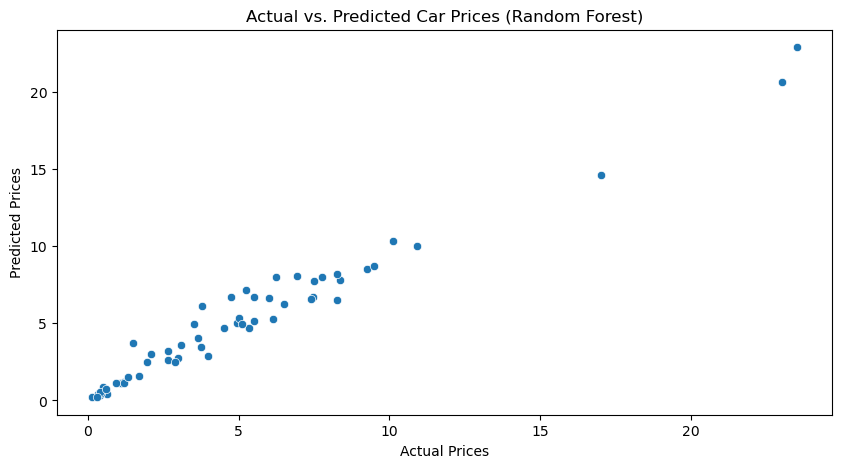

In [41]:

# Visualize Actual vs. Predicted Prices (for Random Forest)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Car Prices (Random Forest)")
plt.show()
